> RoyChao

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
print(df_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OR      392 non-null    int64  
 1   date    392 non-null    int64  
 2   s_min   392 non-null    int64  
 3   s_max   392 non-null    int64  
 4   s_skew  392 non-null    float64
 5   s_kurt  392 non-null    float64
 6   d_min   392 non-null    int64  
 7   d_max   392 non-null    int64  
 8   d_skew  392 non-null    float64
 9   d_kurt  392 non-null    float64
 10  i_min   392 non-null    float64
 11  i_max   392 non-null    float64
 12  i_skew  392 non-null    float64
 13  i_kurt  392 non-null    float64
 14  c_min   392 non-null    float64
 15  c_max   392 non-null    float64
 16  c_skew  392 non-null    float64
 17  c_kurt  392 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 58.2 KB
None


## 3-1 / (Training / Testing) & (X / Y) Set 

In [18]:
df_train = df_dataset.iloc[0:382]
df_test = df_dataset.iloc[382:392]

In [19]:
train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

## 3-2 / Models 10++ : Regression

In [20]:
# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

In [21]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

KNeighborsRegressor
average train MSE: 1339.500442860751
    min train MSE: 1116.9746909308387
    max train MSE: 1495.4916955017297
average valid MSE: 8337.241163260634
    min valid MSE: 5240.874293628808
    max valid MSE: 12264.83834487535
SVR
average train MSE: 2208.3521665508124
    min train MSE: 1116.9746909308387
    max train MSE: 3314.533845975973
average valid MSE: 10320.621470164213
    min valid MSE: 5240.874293628808
    max valid MSE: 13709.652132726886
NuSVR
average train MSE: 2410.3829404037097
    min train MSE: 1116.9746909308387
    max train MSE: 3314.533845975973
average valid MSE: 10632.309368023549
    min valid MSE: 5240.874293628808
    max valid MSE: 13709.652132726886
DecisionTreeRegressor
average train MSE: 1807.7872053027822
    min train MSE: 0.0
    max train MSE: 3314.533845975973
average valid MSE: 11408.0119239859
    min valid MSE: 5240.874293628808
    max valid MSE: 16008.088123268699
RandomForestRegressor
average train MSE: 1499.873577599636
    

## 3-3 / Figures: Best Results

<AxesSubplot:>

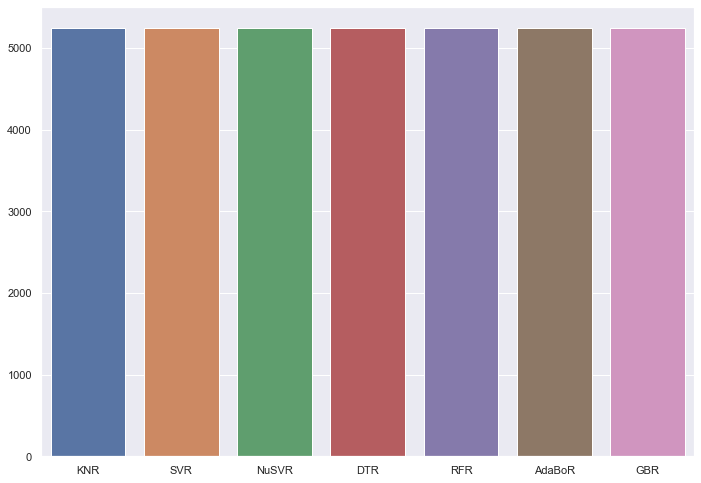

In [22]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = best
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-4 / FIgures: Average Results

<AxesSubplot:>

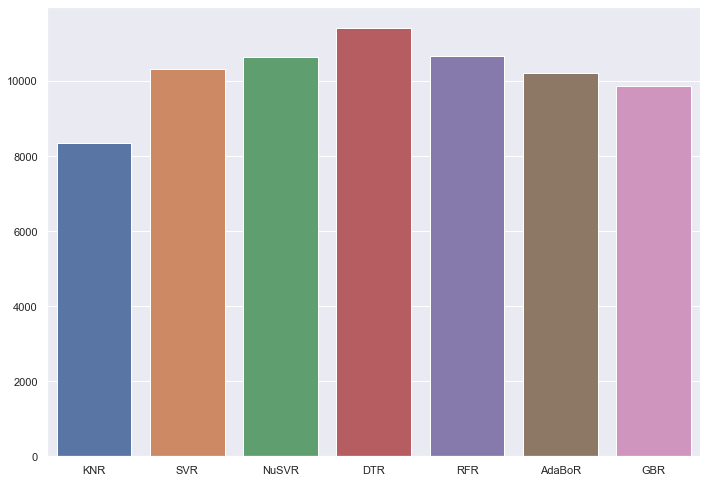

In [23]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = avg
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-5 / Select Best Models

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'learning_rate':[0.1, 0.01, 0.001], 'n_estimators':[100, 300], 'subsample':[1], 'max_depth':[3, 5, 7]}

# Split data into "trainning data", "testing data", and "validation data"
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=12)
# Try different model parameters
grid = GridSearchCV(GradientBoostingRegressor(random_state=19477), param_grid, verbose=5, n_jobs=-1)
# Train model
grid.fit(train_x, train_y)

grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-6.649 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-3.411 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.375 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.072 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.223 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-15.014 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-4.065 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-0.507 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=300, subs

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}

## 3-6 / Learning rate : 0.1

In [51]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 30.87430913334955
    min train MSE: 25.059572414720293
    max train MSE: 38.22492571964638
average valid MSE: 8183.270707328181
    min valid MSE: 5991.81351541416
    max valid MSE: 11662.206392455302


<AxesSubplot:>

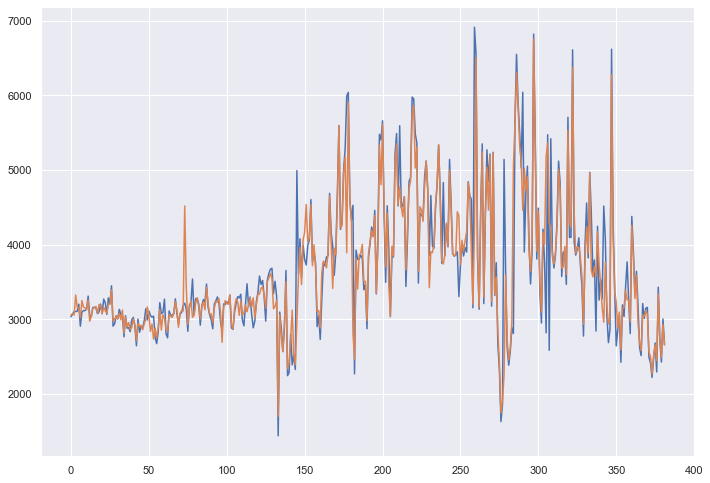

In [52]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 60064.463461267085
MAE: 59.92145263668965


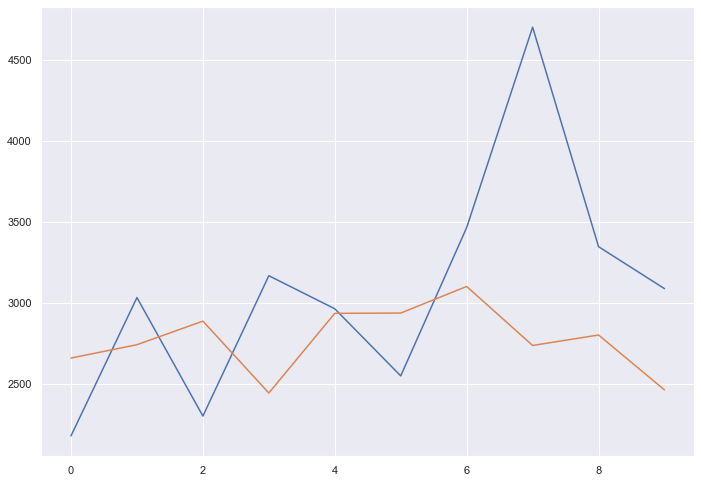

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

## 3-7 / Learning rate : 0.01:

In [75]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 872.5632957607328
    min train MSE: 706.4347258480491
    max train MSE: 984.856988735189
average valid MSE: 7397.138822230537
    min valid MSE: 5207.01558632671
    max valid MSE: 11035.268804474299


<AxesSubplot:>

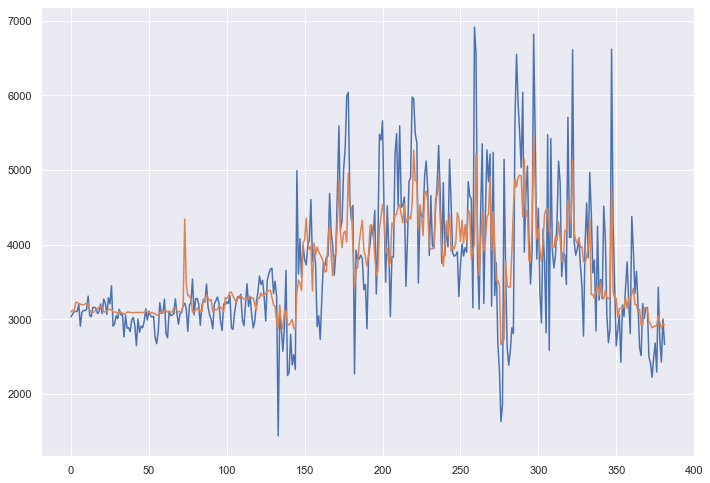

In [76]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 45849.10113245579
MAE: 50.088289332538594


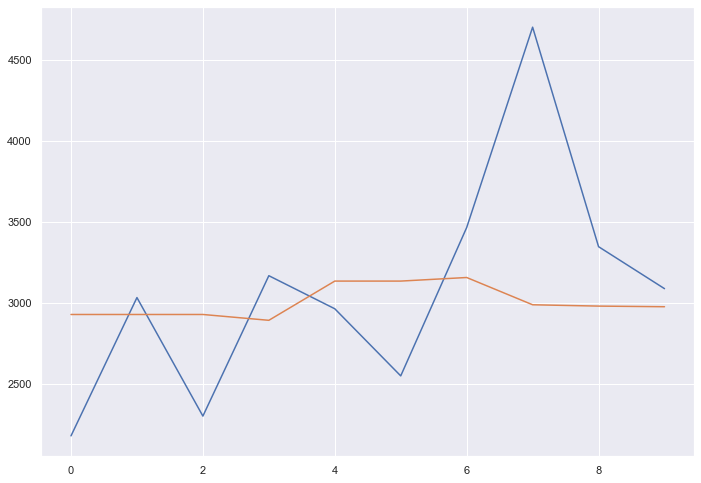

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 